<a href="https://colab.research.google.com/github/CennetNur4/DataScience-Proje/blob/main/walker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Veri setini yükle
file_path = "/content/sample_data/full_dataset.csv"
df = pd.read_csv(file_path)

# İlk birkaç satırı göstererek yapıyı inceleyelim
df.head()


,label,acc_x_0,acc_x_1,acc_x_2,acc_x_3,acc_x_4,acc_x_5,acc_x_6,acc_x_7,acc_x_8,...,gy_z_150,gy_z_151,gy_z_152,gy_z_153,gy_z_154,gy_z_155,gy_z_156,gy_z_157,gy_z_158,gy_z_159
0,idle,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,1.6440,1.6856,1.5975,1.4654,1.5300,1.5300,1.5900,1.5629,1.4559,1.4666
1,fall,-0.0008,0.0181,0.1298,0.1815,0.1867,0.0526,0.0188,0.0228,0.3152,...,1.2886,1.2177,1.3184,1.1846,0.7587,0.8685,0.7453,0.5273,0.8011,0.8872
2,step,0.0200,0.0200,0.0276,0.0201,0.0000,0.0000,0.0000,0.0107,0.0291,...,-0.5565,-0.1801,-0.2183,-0.3190,-0.3448,-0.3691,-0.3310,-0.2755,-0.2912,-0.2433
3,motion,-0.0348,-0.0104,0.0309,0.0373,0.0498,0.0600,0.0984,0.0810,0.0559,...,-0.5500,-0.5500,-0.2313,-0.1530,-0.1978,-0.3943,-0.4711,-0.1704,-0.3037,-0.5155
4,step,0.0200,0.0172,0.0100,0.0020,-0.0099,0.0024,0.0155,0.0357,0.0200,...,-0.5644,-0.5155,-0.5806,-0.6057,-0.5801,-0.5544,-0.5491,-0.5115,-0.4625,-0.3833


In [ ]:
# Veri setini yeniden yükleyelim
import pandas as pd

file_path = "/content/sample_data/full_dataset.csv"
df = pd.read_csv(file_path)

# Etiketleri al
labels = df['label'].unique()
labels


array(['idle', 'fall', 'step', 'motion'], dtype=object)

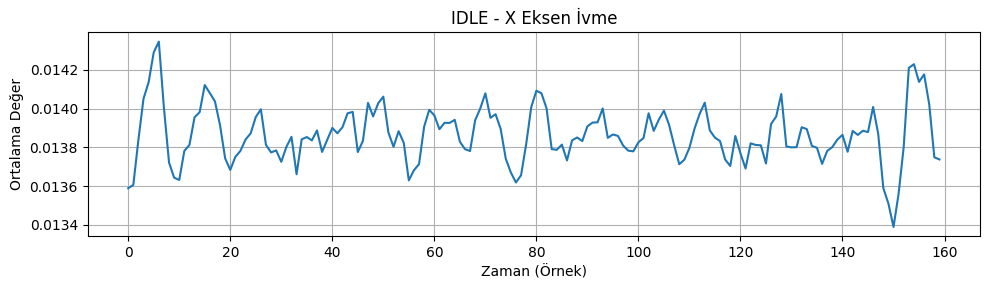

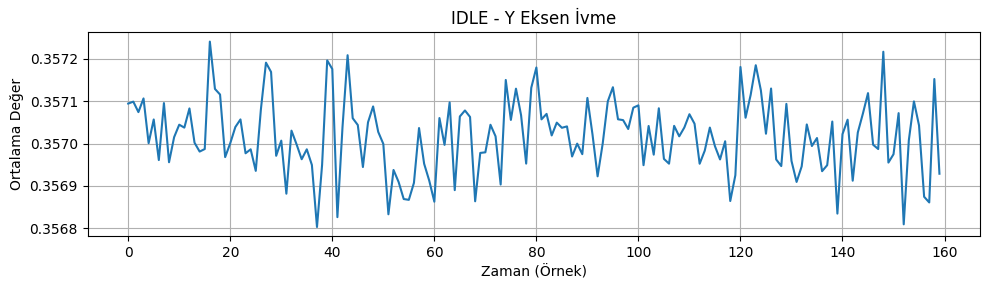

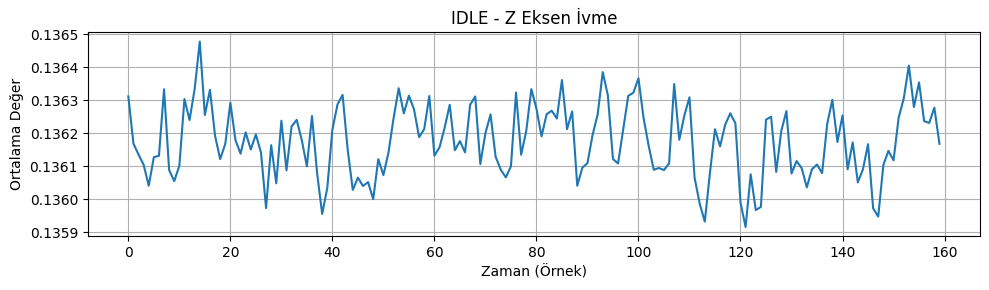

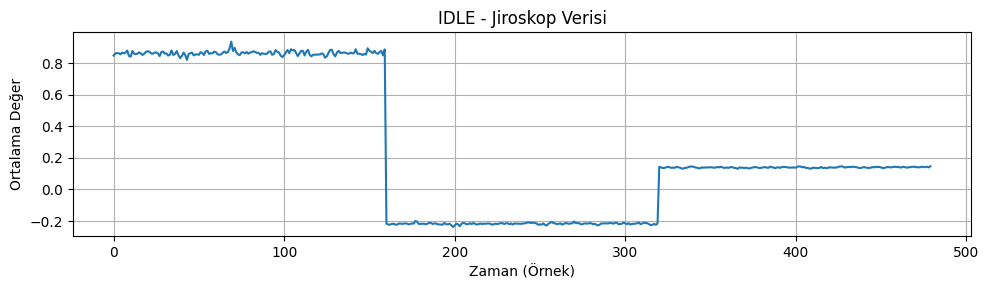

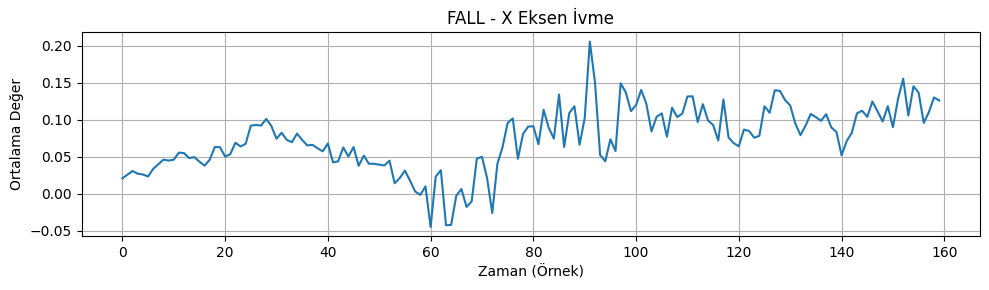

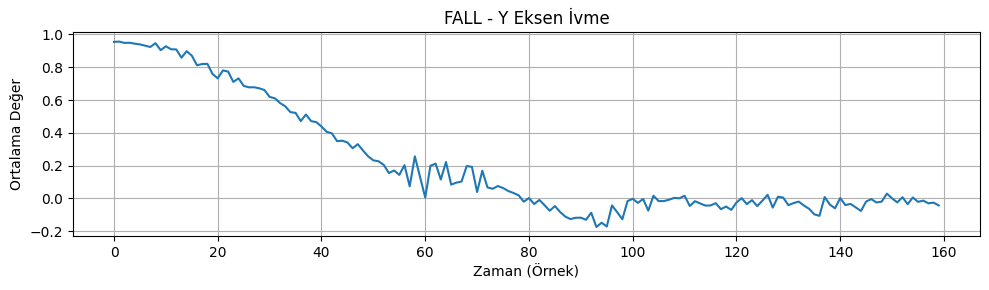

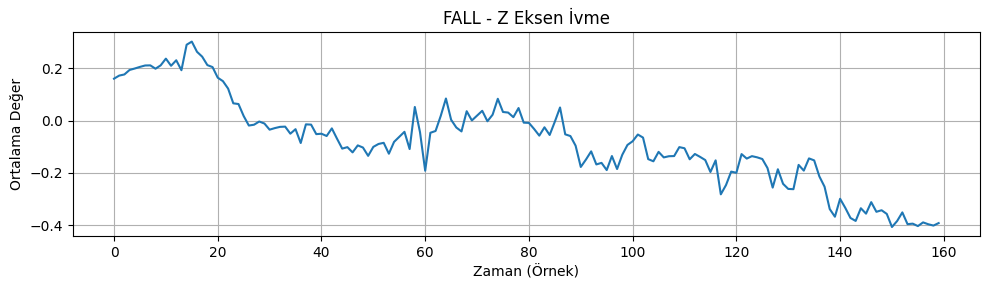

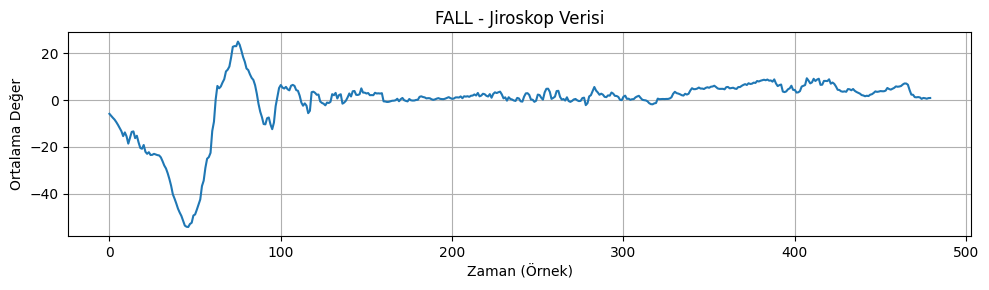

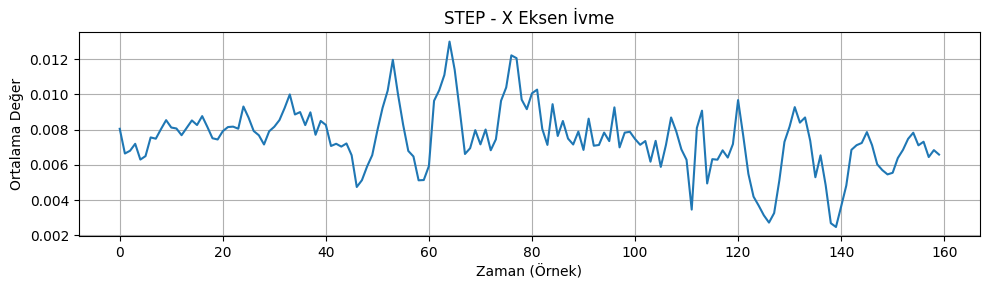

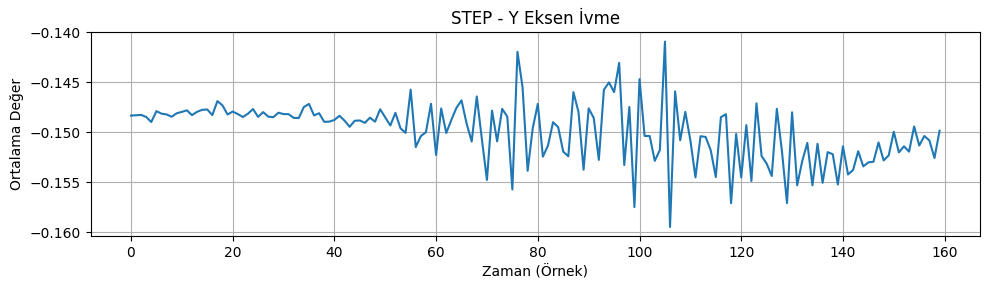

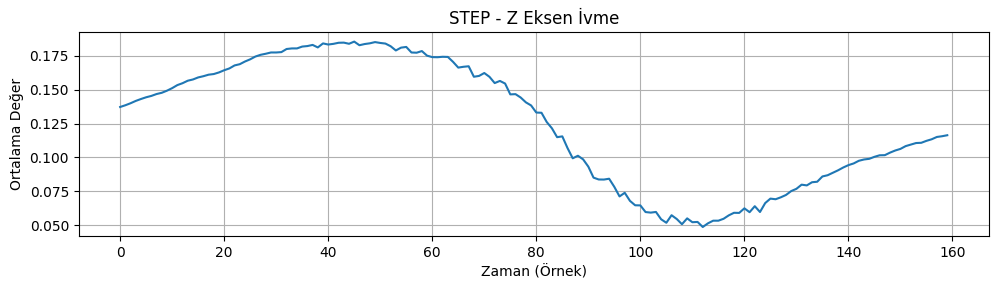

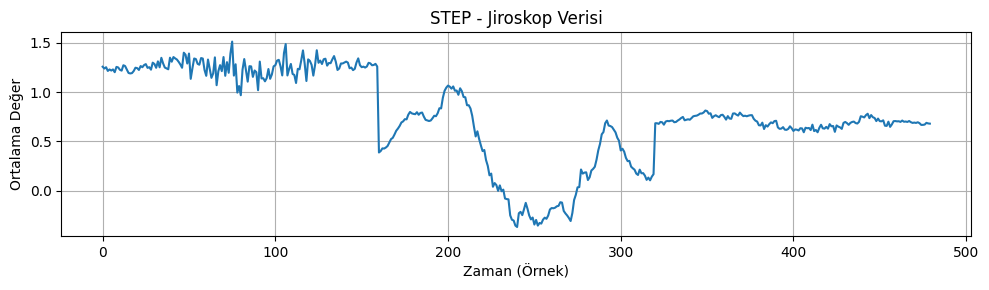

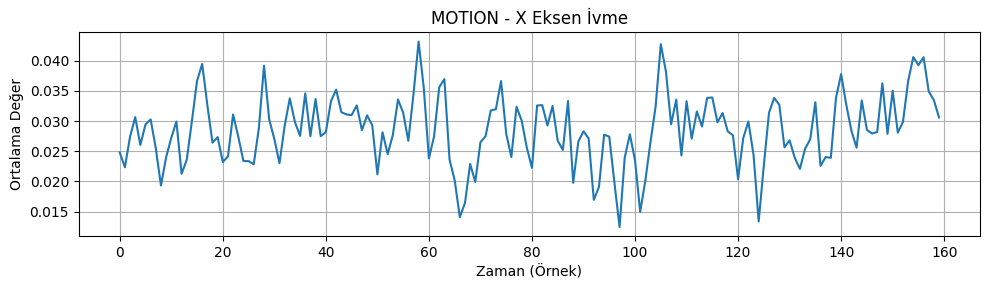

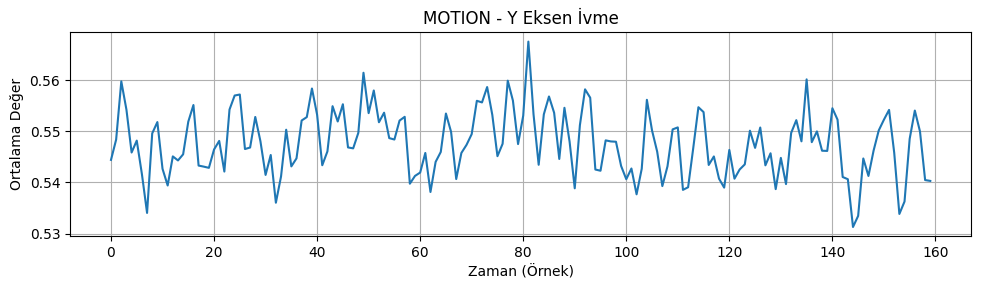

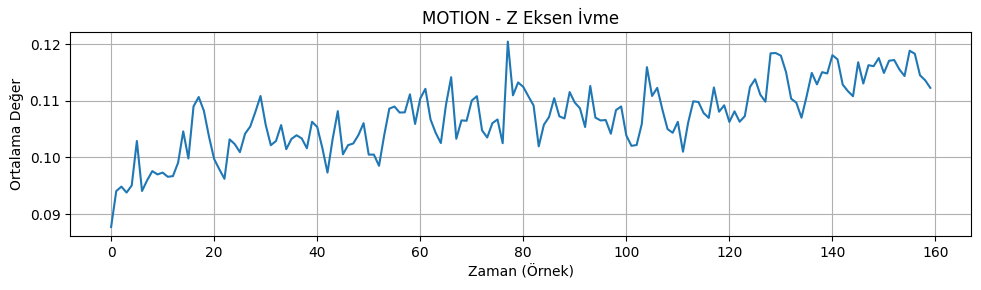

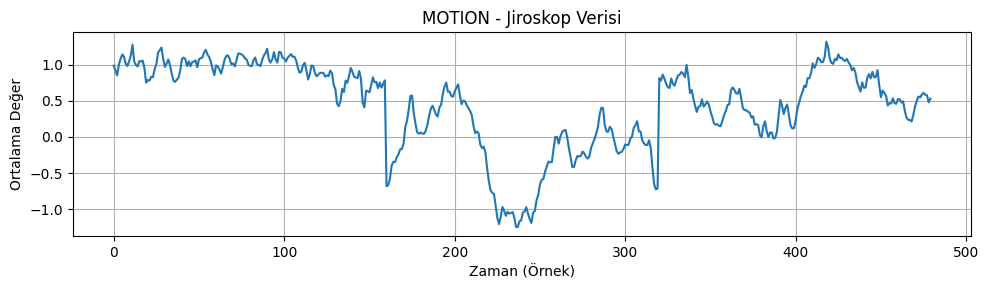

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sensör veri sütunlarını grupla
acc_x_cols = [col for col in df.columns if "acc_x_" in col]
acc_y_cols = [col for col in df.columns if "acc_y_" in col]
acc_z_cols = [col for col in df.columns if "acc_z_" in col]
gy_cols = [col for col in df.columns if "gy_" in col]

# Etiketlere göre işlem yapan fonksiyon
def plot_by_label(label):
    subset = df[df['label'] == label]

    def plot_group(columns, title):
        mean_values = subset[columns].mean(axis=0).values
        plt.figure(figsize=(10, 3))
        plt.plot(mean_values)
        plt.title(f"{label.upper()} - {title}")
        plt.xlabel("Zaman (Örnek)")
        plt.ylabel("Ortalama Değer")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    plot_group(acc_x_cols, "X Eksen İvme")
    plot_group(acc_y_cols, "Y Eksen İvme")
    plot_group(acc_z_cols, "Z Eksen İvme")
    plot_group(gy_cols, "Jiroskop Verisi")

# Tüm etiketler için çizim yap
for label in labels:
    plot_by_label(label)


    ##Başlangıçta değer ~0.95 civarında → bu durumda kişi muhtemelen ayakta duruyor ya da yavaş bir hareket içinde.
    ##Ardından sürekli bir düşüş → ivmenin sıfıra ve negatife kayması, kişinin dengesini kaybettiği ve düşüş yaşadığı anlamına gelebilir.


In [ ]:
!pip install pandas numpy scikit-learn tensorflow matplotlib


Model eğitiliyor: ACC_X


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


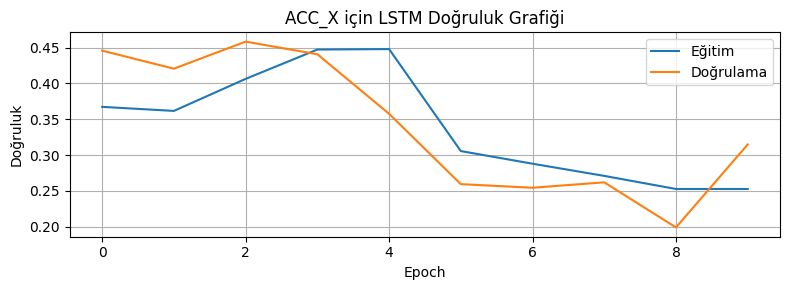

Model eğitiliyor: ACC_Y


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


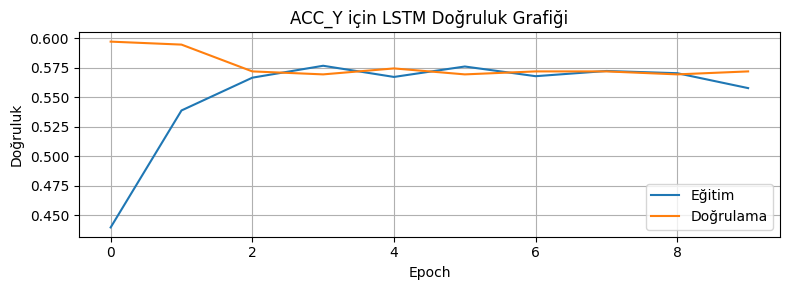

Model eğitiliyor: ACC_Z


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


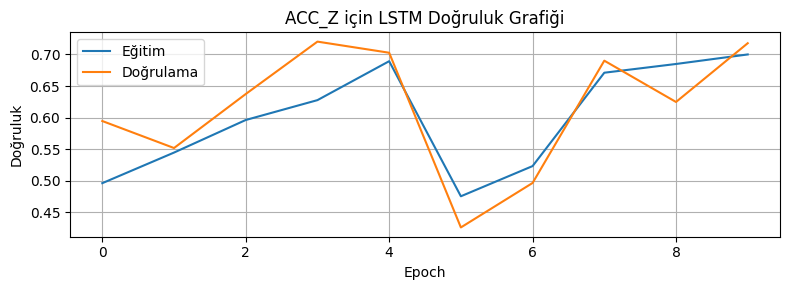

Model eğitiliyor: GY


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


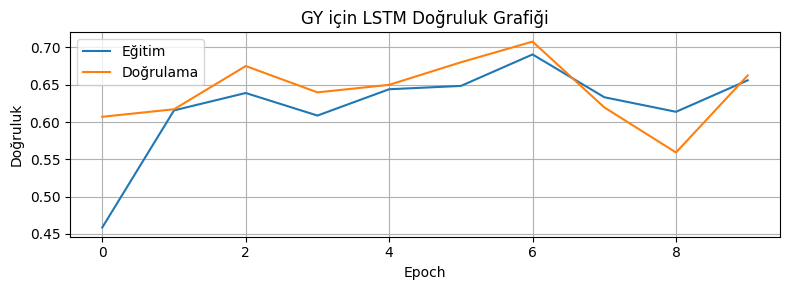

ACC_X - Test Doğruluğu: 31.25%
ACC_Y - Test Doğruluğu: 54.23%
ACC_Z - Test Doğruluğu: 71.17%
GY - Test Doğruluğu: 63.31%


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical


# 5. Etiketleri sayıya ve one-hot encoding'e çevir
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['label'])
y_categorical = to_categorical(y_encoded)

# 6. Sensör gruplarını ayır
sensor_groups = {
    'acc_x': [col for col in df.columns if 'acc_x_' in col],
    'acc_y': [col for col in df.columns if 'acc_y_' in col],
    'acc_z': [col for col in df.columns if 'acc_z_' in col],
    'gy':    [col for col in df.columns if 'gy_' in col],
}

results = {}

# 7. Her sensör grubu için ayrı LSTM modeli eğit
for group_name, columns in sensor_groups.items():
    print(f"Model eğitiliyor: {group_name.upper()}")

    X = df[columns].values
    X = X.reshape((X.shape[0], X.shape[1], 1))  # (örnek, zaman, kanal)

    X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

    model = Sequential([
        LSTM(64, input_shape=(X.shape[1], 1)),
        Dense(32, activation='relu'),
        Dense(y_categorical.shape[1], activation='softmax')
    ])

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

    results[group_name] = {
        'model': model,
        'history': history.history,
        'test_accuracy': test_acc
    }

    # Doğruluk grafiği çiz
    plt.figure(figsize=(8, 3))
    plt.plot(history.history['accuracy'], label='Eğitim')
    plt.plot(history.history['val_accuracy'], label='Doğrulama')
    plt.title(f"{group_name.upper()} için LSTM Doğruluk Grafiği")
    plt.xlabel("Epoch")
    plt.ylabel("Doğruluk")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 8. Özet doğruluk sonuçlarını yazdır
for group, res in results.items():
    print(f"{group.upper()} - Test Doğruluğu: {res['test_accuracy']*100:.2f}%")
